In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [39]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

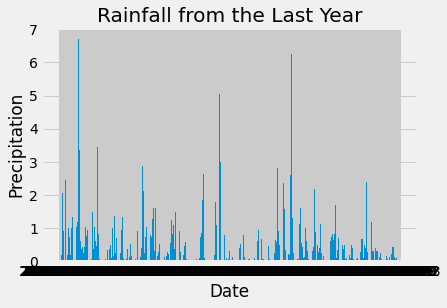

In [138]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
predata=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dfp=pd.DataFrame(predata)
dfp
# Sort the dataframe by date
dfp.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(dfp.date,dfp.prcp)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Rainfall from the Last Year")
plt.show()





In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dfp[["prcp"]].describe()
 

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number stations in the dataset
query = session.query(measurement.station.distinct().label("station"))
ids = [row.station for row in query.all()]
len(ids)

9

In [92]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy.sql import label
session.query(
          label('station', measurement.station), func.count(measurement.station)
).group_by(measurement.station).all()


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [118]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most stuff USC00519397
#high_temp=session.query(measurement.tobs).\
 #   filter(measurement.station == 'USC00519397').\
  #  order_by(measurement.date).all()
#min(high_temp)
#max(high_temp)



avg=session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519397').\
    order_by(measurement.date).all()
print(avg)


[(56.0, 87.0, 74.55323054331865)]


Text(0.5, 1.0, 'Frequency of Temperaures')

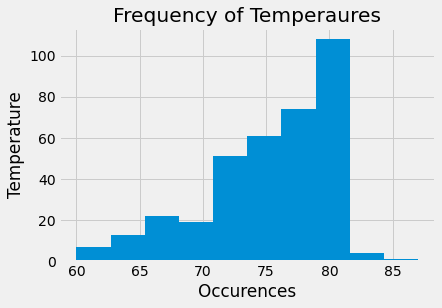

In [149]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp=session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519397').\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

test=np.array(temp)   
#type(temp)

plt.hist(test, bins=10)
plt.xlabel("Occurences")
plt.ylabel("Temperature")
plt.title("Frequency of Temperaures")
#plt.hist(temp, bins=10,rwidth=1)

# Close session

In [ ]:
# Close Session
session.close()